In [2]:
# Import statements - I use a lot, don't worry about these
import numpy as np

import matplotlib.pyplot as plt

from scipy.optimize import minimize

import emcee

import corner

from IPython.display import display, Math

import matplotlib as mpl
# mpl.rc('font', family='serif', serif='Times New Roman')
# mpl.rcParams['figure.dpi'] = 600
import seaborn as sns
#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:96% !important; }</style>"))
%matplotlib inline
import glob 
import pandas as pd
#pd.options.display.max_columns = 100
#pd.options.display.max_rows = 100

# plt.rcParams.update({'figure.figsize': (12,6)})
#from astroquery.simbad import Simbad
#from astroquery.vizier import Vizier
#from astroquery.mast import Observations
#import astropy.units as u

#Keplerspline:
from keplersplinev2 import *
import lightkurve as lk
from astropy.io import fits
import sys

#Batman
import batman

import warnings
warnings.filterwarnings('ignore')

import scipy.stats as stats

from copy import deepcopy
import statistics as st
from astropy.table import Table
import math
import ttvfast
from ttvfast import models


In [145]:
TTVdataMAST = pd.read_csv('CTTresiduals.csv')
TTVDataJudC = pd.read_csv('transit_center_c_outer_subtract.csv')
TTVDataJudB = pd.read_csv('transit_center_b_inner_subtract.csv')
combined_df = pd.concat([TTVdataMAST, TTVDataJudB, TTVDataJudC])
combined_df = combined_df.sort_values(by='id')

print(TTVdata)
time = TTVdata['Epoch']
T0 = TTVdata['T0 Observed']
RealResiduals = TTVdata['CTT Residuals']

     Planet Number  Epoch  T0 Observed  Model Prediction  CTT Residuals
0                0      1  1657.903557       1657.904880      -0.001323
1                0      2  1666.254510       1666.254801      -0.000291
2                0      3  1674.606448       1674.604718       0.001730
3                0      4          NaN       1682.954632            NaN
4                0      5          NaN       1691.304542            NaN
5                0      6          NaN       1699.654449            NaN
6                0      7          NaN       1708.004352            NaN
7                0      8          NaN       1716.354251            NaN
8                0      9          NaN       1724.704147            NaN
9                0     10          NaN       1733.054040            NaN
10               0     11          NaN       1741.403929            NaN
11               0     12          NaN       1749.753814            NaN
12               0     13          NaN       1758.103696        

In [143]:
#print(time)
#print(T0)

In [132]:
gravity = 0.000295994511                        # AU^3/day^2/M_sun
stellar_mass = 0.684                    # M_sun


planet1 = models.Planet(
    mass = 0.001011864,                         # M_sun ACCURATE
    period = 8.3501898,              # days
    eccentricity = 0.0398,
    inclination = 87.61,         # degrees
    longnode = -1.1729336712101943e-18,           # degrees NOT ACCURATE
    argument = 182.5,            # degrees
    mean_anomaly = -8.7093652691581923e+01,       # degrees NOT ACCURATE
)

planet2 = models.Planet(
    mass = 0.000059470859,
    period = 4.074554,
    eccentricity = 0.052162,
    inclination = 87.49,
    longnode = 4.6220554014026838e-01, # NOT ACCURATE
    argument = 141.11,
    mean_anomaly = -1.9584857031843157e+01, #NOTE ACCURATE
)

planets = [planet1, planet2]
Time = 1650                                    # days
dt = 0.1                                       # days
Total = 3150                                    # days

results = ttvfast.ttvfast(planets, stellar_mass, Time, dt, Total)


In [133]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [134]:
df = pd.DataFrame({'planet': results.get("positions")[0], 'epoch': results.get("positions")[1], 'times': results.get("positions")[2],
                  'rsky_vals': results.get("positions")[3], 'vsky_vals': results.get("positions")[4]})
df

,planet,epoch,times,rsky_vals,vsky_vals
0,1,0,1653.805312,0.001872,0.069946
1,1,1,1657.918187,0.001878,0.069739
2,0,0,1658.324876,0.002961,0.053391
3,1,2,1662.035213,0.001885,0.069467
4,1,3,1666.154339,0.001891,0.069181
5,0,1,1666.668101,0.002961,0.053399
6,1,4,1670.276512,0.001899,0.068905
7,1,5,1674.400563,0.001906,0.068555
8,0,2,1675.010443,0.002961,0.053406
9,1,6,1678.526367,0.001914,0.068280


In [135]:
planet1_df = df[df.planet == 0]

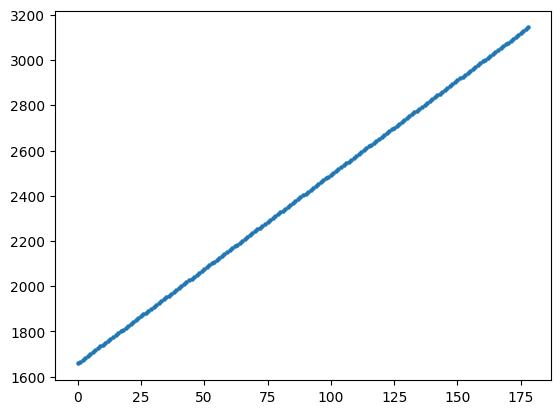

In [136]:
plt.scatter(planet1_df.epoch[planet1_df.times != -2.0], planet1_df.times[planet1_df.times != -2.0], s = 5)

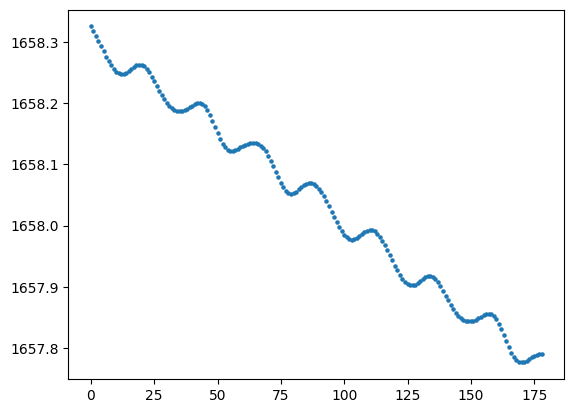

In [137]:
plt.scatter(planet1_df.epoch[planet1_df.times != -2.0], 
            planet1_df.times[planet1_df.times != -2.0] - planet1_df.epoch[planet1_df.times != -2.0]*(8.3501898), s = 5)
# We have downward trend, sinusoid showing where the expected time is but it's transiting at a sooner time than expected.
# Y-axis is the expected center time of transit.
# When taking the data in, mcmc and ttv data should have the same slope.
# Use Scipy optimize to detrend the data.
# MCMC start first with 1 planet, then using calculated planet mass to do another fit. DO NOT FIT FOR TWO PLANETS AT THE SAME TIME. 

In [138]:
epoch_data = planet1_df.epoch[planet1_df.times != -2.0]
TTV_data = planet1_df.times[planet1_df.times != -2.0] - planet1_df.epoch[planet1_df.times != -2.0]*(8.3501898)
def linear_regression(params):
    m, b = params
    y_pred = m * epoch_data + b
    return np.sum((TTV_data - y_pred) ** 2)

# Initial guess for [m, b]
initial_guess = [-8.3501, 1650]

# Run optimization
result = minimize(linear_regression, initial_guess)

# Extract best-fit parameters
m_opt, b_opt = result.x
print(f"Optimal slope (m): {m_opt:.4f}")
print(f"Optimal intercept (b): {b_opt:.4f}")


Optimal slope (m): -0.0030
Optimal intercept (b): 1658.3059


In [141]:
SynResiduals = TTV_data - (m_opt * epoch_data + b_opt)


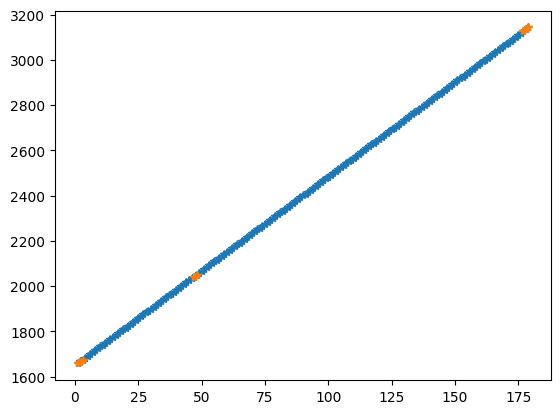

In [157]:
plt.plot(time, planet1_df.times[planet1_df.times != -2.0], '*')
plt.plot(time, T0, '*')

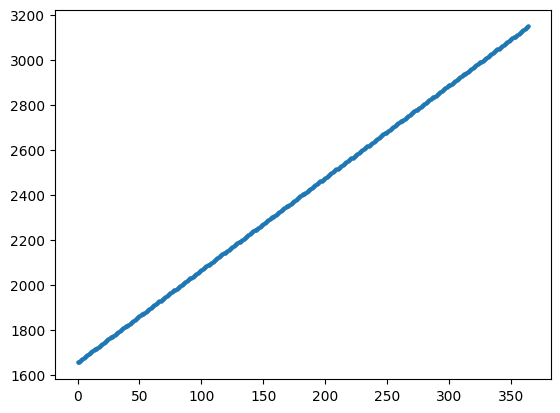

In [128]:
planet2_df = df[df.planet == 1]
plt.scatter(planet2_df.epoch, planet2_df.times, s = 5)
#FIT TO THIS GRAPH

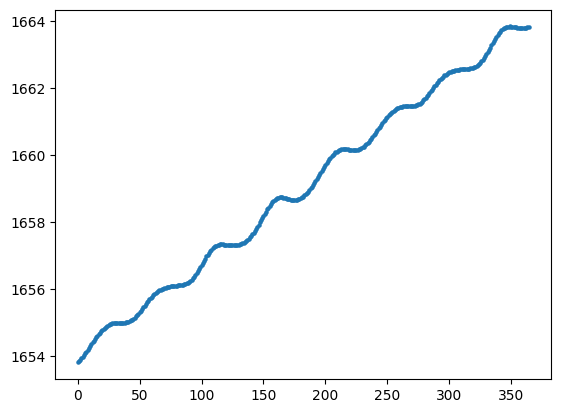

In [151]:
plt.scatter(planet2_df.epoch, planet2_df.times - planet2_df.epoch*(4.074554), s = 5)

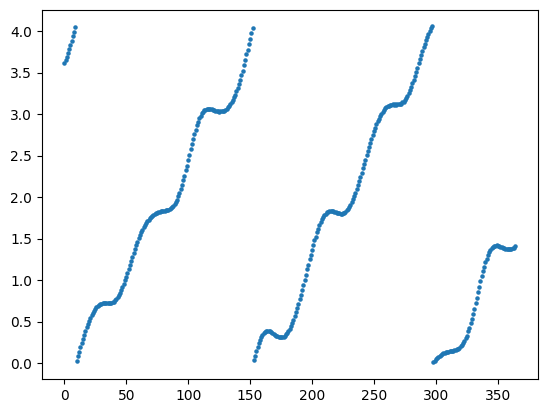

In [152]:
period = 4.074554
Phase = (planet2_df.times - planet2_df.epoch*(4.074554)) % period
plt.scatter(planet2_df.epoch, Phase, s = 5)#planet2_df.times - planet2_df.epoch*(4.074554), s = 5)

In [148]:
epoch_data = planet2_df.epoch
TTV_data = planet2_df.times - planet2_df.epoch*(4.074554)
def linear_regression(params):
    m, b = params
    y_pred = m * epoch_data + b
    return np.sum((TTV_data - y_pred) ** 2)

# Initial guess for [m, b]
initial_guess = [-8.3501, 1650]

# Run optimization
result = minimize(linear_regression, initial_guess)

# Extract best-fit parameters
m_opt, b_opt = result.x
print(f"Optimal slope (m): {m_opt:.4f}")
print(f"Optimal intercept (b): {b_opt:.4f}")


Optimal slope (m): 0.0278
Optimal intercept (b): 1653.9884


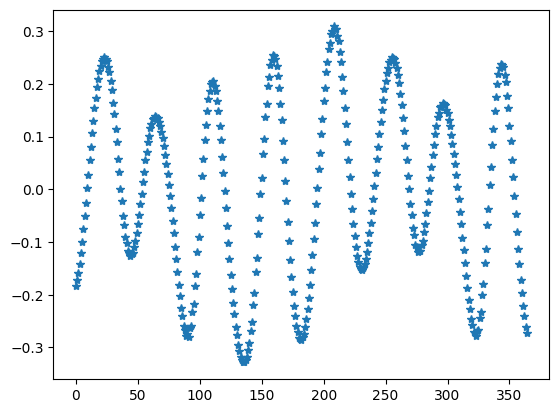

In [149]:
SynResiduals = TTV_data - (m_opt * epoch_data + b_opt)
plt.plot(epoch_data, SynResiduals, '*')

In [64]:
# Define Priors - The boundaries on what is allowed for our model
## Returning 0 shows that the values are valid for the model
## Returning -infinity shows that the values are not valid for the model
def log_prior(theta):
    ## Get our parameters for the model
    mC, mB = theta
    
    ## Check if the t0 value is less than or greater than 0.1
    if 0.002011864>mC>0.000011864 and  0.000069470859>mB> 0.000049470859: # !! Change these if you want a more constrained fit
        return 0
    
    return -np.inf

In [ ]:
def log_likelihood_TTV(params, ttvs):
    ## Get our parameters for the model
    mC, mB = params
    
    ## Check our parameters against our priors
    ## If lp is negative infinity, the values are invalid, a model will not be calculated, 
    ##  and these values will be labeled as very unlikely

    lp = log_prior((mC, mB))
    if not np.isfinite(lp):
        return -np.inf
    
    gravity = 0.000295994511                        # AU^3/day^2/M_sun
    stellar_mass = 0.684                    # M_sun


    planet1 = models.Planet(
        mass = 0.001011864,                         # M_sun ACCURATE
        period = 8.3501898,              # days
        eccentricity = 0.0398,
        inclination = 87.61,         # degrees
        longnode = -1.1729336712101943e-18,           # degrees NOT ACCURATE
        argument = 182.5,            # degrees
        mean_anomaly = -8.7093652691581923e+01,       # degrees NOT ACCURATE
    )

    planet2 = models.Planet(
        mass = 0.000059470859,
        period = 4.074554,
        eccentricity = 0.052162,
        inclination = 87.49,
        longnode = 4.6220554014026838e-01, # NOT ACCURATE
        argument = 141.11,
        mean_anomaly = -1.9584857031843157e+01, #NOTE ACCURATE
    )

    planets = [planet1, planet2]
    Time = 1650                                    # days
    dt = 4.074554                                       # days
    Total = 3150                                    # days

    results = ttvfast.ttvfast(planets, stellar_mass, Time, dt, Total)
    
    ## Compare using chi squared
    residuals = flux - model_flux
    ## Return our chi squared value for later evaluation done by emcee
    return -0.5 * np.sum((residuals**2) / (flux_err**2))

In [ ]:
# Example data (replace `t`, `flux`, and `error` with your actual data arrays)
# t, flux, error = ... (define these as lists of arrays per epoch)
# epochs = ... (define epochs array)

ndim = 2
nwalkers = 24

# Store t0 values for each epoch fit
random_additions = np.random.rand(nwalkers, ndim) * 0.0000001
mC_guess = 0.01
mB_guess = 0.005
p0 = np.add([mC,mB], random_additions)
    
# Declare the sampler for the current epoch
sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_likelihood_TTV,
    args=(np.asarray(time_temp.values.flatten()), np.asarray(flux_temp.values.flatten()), np.asarray(error_temp.values.flatten())) #IDK WHAT DATA TO PUT IN
)
sampler.run_mcmc(p0, 5000, progress=True)
    
## Retrieve samples and plot the trace for current epoch
samples = sampler.get_chain()
fig, axes = plt.subplots(ndim, figsize=(10, 7), sharex=True)
labels = ['Mass C Planet', 'Mass B Planet']
    
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)
    axes[-1].set_xlabel("Step Number")
plt.show()

# Discard burn-in samples, flatten chain, and plot corner plot for posterior distribution
flat_samples = sampler.get_chain(discard=1000, thin=11, flat=True)
fig = corner.corner(flat_samples, labels=labels)
plt.show()



# EDIT THIS SECTION
# Calculate and display median and uncertainties for t0
mcmc = np.percentile(flat_samples[:, 0], [16, 50, 84])
q = np.diff(mcmc)
#txt = r"\mathrm{{{3}}} = {0:.7f}_{{-{1:.7f}}}^{{+{2:.7f}}}"
#txt = txt.format(mcmc[1], q[0], q[1], labels[0])
#display(Math(txt))
    
# Save the best-fit t0 value for this epoch
t0values.append(mcmc[1])
t0values_upper.append(q[1])
t0values_lower.append(q[0])
# Update model with best-fit t0 to plot the fitted light curve
params.t0 = mcmc[1]
best_fit = batman.TransitModel(params, time_temp.values.flatten())  # Use BATMAN with current t0
best_flux = best_fit.light_curve(params)

#Plot data and best-fit model for the current epoch
plt.figure(figsize=(12, 6))
plt.plot(time_temp.values.flatten(), flux_temp.values.flatten(), "k.", label="Data")
plt.plot(time_temp.values.flatten(), best_flux, "r-", label="Best-fit Model")
plt.xlabel("Time")
plt.ylabel("Flux")
plt.legend()
plt.show()

